# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from keras.models import load_model, Sequential

from keras.layers import LSTM,Dense,Dropout

from sklearn.metrics import r2_score,mean_absolute_error, mean_absolute_percentage_error

# 2. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Dataset.csv')

In [10]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/12/2024,"27,150.00","27,700.00","27,700.00","27,050.00",28.63M,-1.27%
1,1/11/2024,"27,500.00","27,450.00","27,650.00","27,400.00",15.26M,0.55%
2,1/10/2024,"27,350.00","27,700.00","27,750.00","27,250.00",32.64M,-1.26%
3,1/9/2024,"27,700.00","27,900.00","27,950.00","27,500.00",28.62M,-0.54%
4,1/8/2024,"27,850.00","27,950.00","28,250.00","27,850.00",31.24M,0.18%


In [11]:
df = df.drop(columns=["Vol.", "Change %"])

In [12]:
df.head()

,Date,Price,Open,High,Low
0,1/12/2024,"27,150.00","27,700.00","27,700.00","27,050.00"
1,1/11/2024,"27,500.00","27,450.00","27,650.00","27,400.00"
2,1/10/2024,"27,350.00","27,700.00","27,750.00","27,250.00"
3,1/9/2024,"27,700.00","27,900.00","27,950.00","27,500.00"
4,1/8/2024,"27,850.00","27,950.00","28,250.00","27,850.00"


# 3. Describe Data

In [16]:
df.shape

(1002, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1002 non-null   datetime64[ns]
 1   Price   1002 non-null   object        
 2   Open    1002 non-null   object        
 3   High    1002 non-null   object        
 4   Low     1002 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 39.3+ KB


In [18]:
df.describe()

<ipython-input-18-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Date,Price,Open,High,Low
count,1002,1002,1002,1002,1002
unique,1002,627,609,608,629
top,2024-01-12 00:00:00,"20,800.00","20,800.00","21,100.00","21,600.00"
freq,1,10,7,7,11
first,2020-01-13 00:00:00,NaN,NaN,NaN,NaN
last,2024-01-12 00:00:00,NaN,NaN,NaN,NaN


# 4. Preprocessing

In [26]:
from matplotlib.dates import YearLocator, DateFormatter,MonthLocator

df['Date'] = pd.to_datetime(df.Date, format="%m/%d/%Y")

df = df.sort_values(by = 'Date')

# df['Price'] = df['Price'].str.replace(',', '').astype(float)
# df['Open'] = df['Open'].str.replace(',', '').astype(float)
# df['High'] = df['High'].str.replace(',', '').astype(float)
# df['Low'] = df['Low'].str.replace(',', '').astype(float)

df['Year'] = df['Date'].dt.year






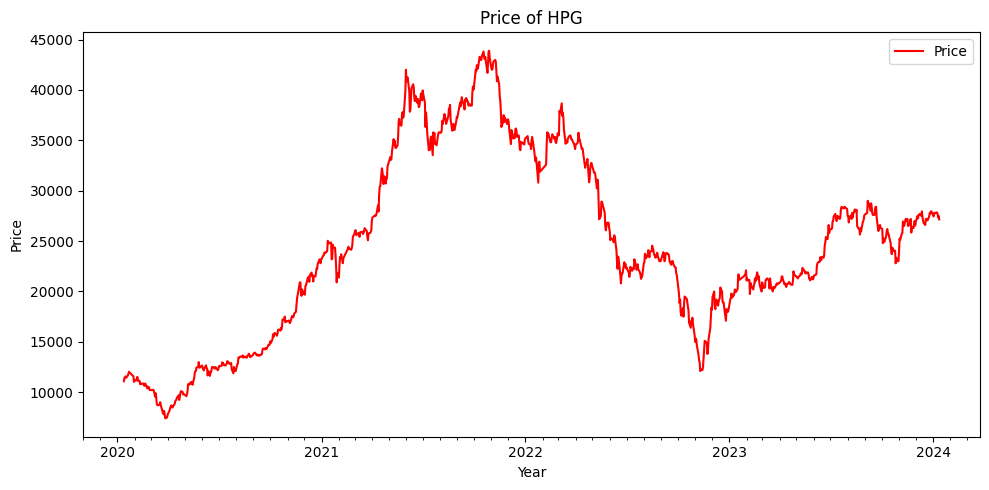

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], label='Price', color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price of HPG')
plt.legend(loc='best')

# Định dạng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [32]:
df1 = pd.DataFrame(df,columns=['Date','Price'])
df1.index = df1.Date
df1.drop('Date',axis=1,inplace=True)
df1.head()

,Price
Date,
2020-01-13,11094.8
2020-01-14,11438.0
2020-01-15,11506.6
2020-01-16,11575.2
2020-01-17,11438.0


In [35]:
data = df1.values
train_data = data[:800]
test_data = data[800:]

In [38]:
data

array([[11094.8],
       [11438. ],
       [11506.6],
       ...,
       [27350. ],
       [27500. ],
       [27150. ]])

In [39]:
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [40]:
sc_train

array([[0.10094836],
       [0.11035522],
       [0.1122355 ],
       ...,
       [0.54649161],
       [0.550603  ],
       [0.54100976]])

In [43]:
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [ ]:
x_train

In [ ]:
y_train

In [48]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [50]:
x_train.shape

(750, 50, 1)

In [51]:
y_train.shape

(750, 1)

# 5. Build model

In [53]:

model = Sequential()

model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mean_absolute_error',optimizer='adam')

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
save_model = "/content/drive/MyDrive/Colab Notebooks/data/save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

In [56]:
y_train = sc.inverse_transform(y_train)
final_model = load_model("/content/drive/MyDrive/Colab Notebooks/data/save_model.hdf5")
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

24/24 [==============================] - 1s 6ms/step


In [ ]:
y_train_predict

# 6. Reuse the model

In [92]:
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

y_test = data[800:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

7/7 [==============================] - 0s 4ms/step


In [89]:
data.shape

(1002, 1)

In [90]:
x_test.shape

(202, 50, 1)

In [93]:
y_test_predict.shape

(202, 1)

# Accuracy of the model

In [84]:
df1.shape

(1002, 1)

In [85]:
train_data1 = df1[50:800]
train_data1.shape

(750, 1)

In [86]:
test_data1 = df1[800:]
test_data1.shape

(202, 1)

In [88]:
y_test_predict.shape

(5,)

<ipython-input-94-a91872654785>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-94-a91872654785>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


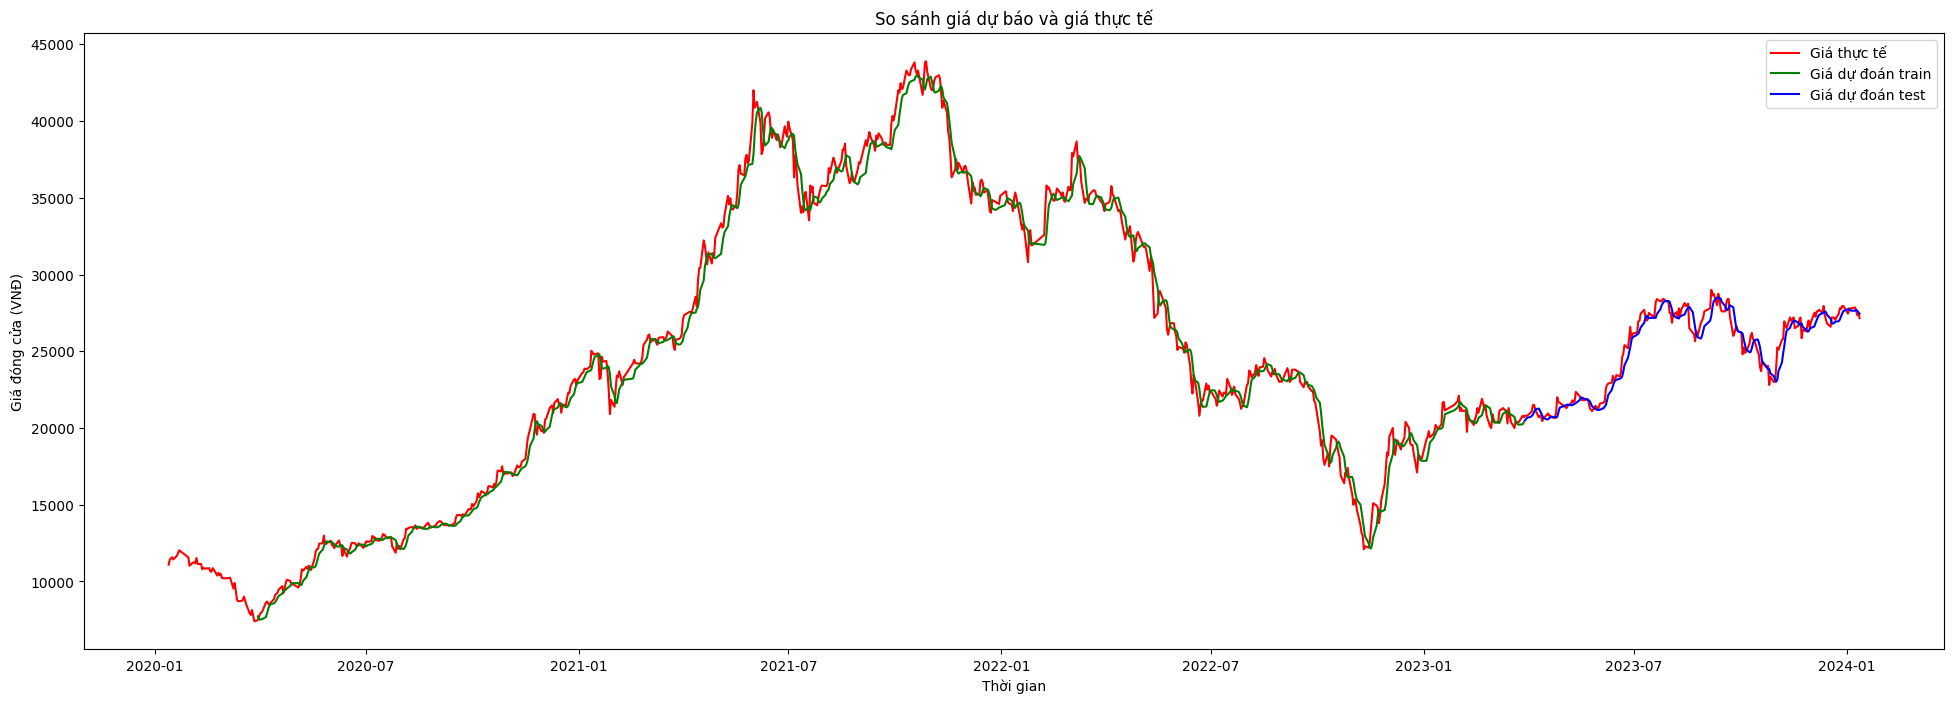

In [94]:
train_data1 = df1[50:800]
test_data1 = df1[800:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Price (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

# Future Predict

1/1 [==============================] - 0s 38ms/step


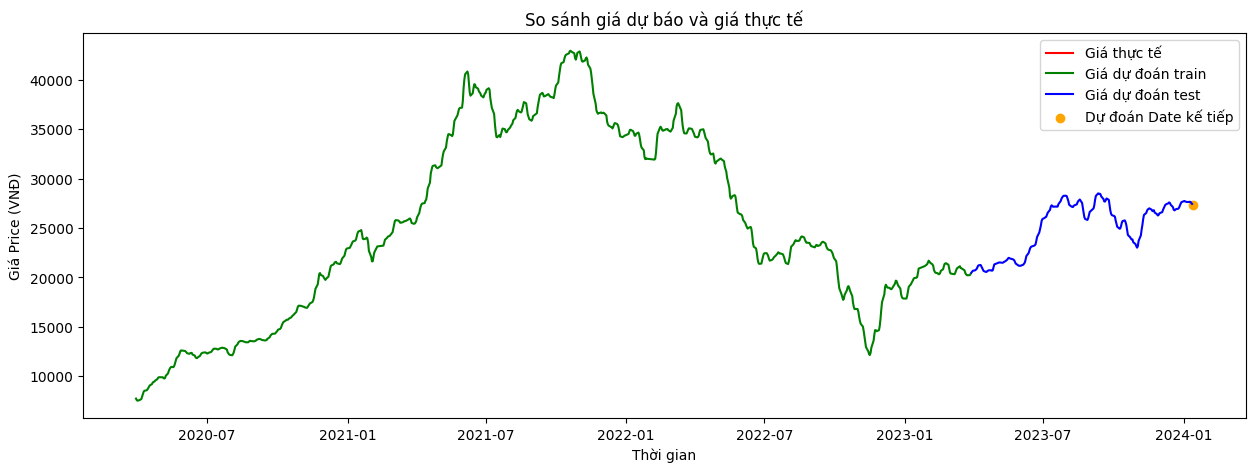

In [96]:

# Lấy Date kế tiếp sau Date cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Date'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi Date kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của Date cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Price'].iloc[-1]])  # Lấy giá trị Price của Date cuối cùng

# Chuẩn hóa giá trị của Date cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho Date kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá Price gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của Date kế tiếp vào DataFrame
df_next = pd.DataFrame({'Date': [next_date], 'Price': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho Date kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Date'], df1['Price'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán Date kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá Price (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [97]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Price'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Date': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Date   Giá dự đoán  Giá ngày trước
0 2024-01-13  27305.255859         27150.0
